In [2]:
from sklearn import datasets
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectFromModel, RFECV
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import RocCurveDisplay
global X_train, X_test, y_train, y_test


def splitlist(list):
    list1 = []
    list2 = []
    for i in list:
        list1.append(i[0])
        list2.append(i[1])
    return list1, list2


def merge_shuffle(list1, list2):
    list = []
    for i in range(len(list1)):
        list.append(list1[i])
        list.append(list2[i])
    # random.shuffle(list)
    return list


def readfile(file):
    f = open(file, "r")
    result = []
    c = 0
    for i in f:
        if c <= 10000:
            # print(c)
            c += 1
            # print(c)
            list = []
            line = i[1:-3].split(", [")
            # print(line)
            list.append(int(line[0]))
            temp = []
            # print(list)
            for j in line[1].split(", "):
                if "." not in j:
                    temp.append(int(j))
                else:
                    temp.append(float(j))
            # print(temp)
            list.append(temp)
            # print("test")
            result.append(list)
    f.close()
    return result


def selectfeatures(features, indexs):
    result = []
    length = len(features[0])
    for w in features:
        temp = []
        for i in range(1, len(w)+1):
            if i in indexs:
                temp.append(w[i-1])
        result.append(temp)
    return result


def Scale():
    global X_train, X_test
    X_train_svm, X_test_svm = X_train, X_test
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_svm = scaler.transform(X_train)
    X_test_svm = scaler.transform(X_test)
    return X_train_svm, X_test_svm


def Kbest(X_train_svm, X_test_svm, n):
    sel = SelectKBest(chi2, k=n)
    sel.fit(X_train_svm, y_train)
    # print(sel.scores_)
    X_train_svm = sel.transform(X_train_svm)
    X_test_svm = sel.transform(X_test_svm)
    return X_train_svm, X_test_svm

def accuracyCM(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

def MYSVM():
    X = Scale()
    X = Kbest(X[0], X[1], 52)
    X_train_svm = X[0]
    X_test_svm = X[1]
    #print("Training samples SVM: ", X_train_svm.shape)
    clf = svm.SVC(kernel='linear')
    print("traning...")
    clf.fit(X_train_svm, y_train)
    y_pred = clf.predict(X_test_svm)
    print("Accuracy linear SVM : ", metrics.accuracy_score(y_test, y_pred))
    conf_mat = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_mat)
    print(classification_report(y_test, y_pred))
    svc_disp = RocCurveDisplay.from_estimator(clf, X_test_svm, y_test)
    plt.show()

def KNN(n):
    X = Scale()
    X = Kbest(X[0], X[1], 48)
    X_train_svm = X[0]
    X_test_svm = X[1]
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train_svm,y_train)
    y_pred = model.predict(X_test_svm)
    print("Accuracy Knn : ", metrics.accuracy_score(y_test, y_pred))
    conf_mat = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_mat)
    print(classification_report(y_test, y_pred))
    svc_disp = RocCurveDisplay.from_estimator(model, X_test_svm, y_test)
    plt.show()
    return metrics.accuracy_score(y_test, y_pred)

def RandomForest(n=54):
    t = idx[:n]
    print("traning...")
    rf_w = RandomForestClassifier(random_state=100, n_estimators=100)
    rf_w.fit(X_train, y_train)
    y_pred_rf_w = rf_w.predict(X_test)
    print("Accuracy Random Forest : ",
          metrics.accuracy_score(y_test, y_pred_rf_w))
    conf_mat = confusion_matrix(y_test, y_pred_rf_w)
    print("Confusion Matrix:")
    print(conf_mat)
    print(classification_report(y_test, y_pred_rf_w))
    # plot Importances
    importances = rf_w.feature_importances_
    final_df = pd.DataFrame(
        {"Features": t, "Importances": importances})
    final_df.set_index('Importances')
    final_df = final_df.sort_values('Importances')
    plt.figure(figsize=(10, 3))
    plt.xticks(rotation=45)
    sns.barplot(x="Features", y="Importances", data=final_df)
    plt.show()
   
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def LDA(n):
    X = Scale()
    X = Kbest(X[0], X[1], n)
    X_train_svm = X[0]
    X_test_svm = X[1]
    model = LinearDiscriminantAnalysis()
    model.fit(X_train_svm, y_train)
    y_pred = model.predict(X_test_svm)
    #print("Accuracy Knn : ", metrics.accuracy_score(y_test, y_pred))
    #conf_mat = confusion_matrix(y_test, y_pred)
    #print("Confusion Matrix:")
    #print(conf_mat)
    #print(classification_report(y_test, y_pred))
    #svc_disp = RocCurveDisplay.from_estimator(model, X_test_svm, y_test)
    #plt.show()
    return metrics.accuracy_score(y_test, y_pred)

def RFRFECV():
    model_tree = RandomForestClassifier(n_estimators=100, random_state=100)
    print("RFECV")
    sel_rfe_tree = RFECV(estimator=model_tree, step=1)
    print("traning...")
    X_train_rfe_tree = sel_rfe_tree.fit_transform(X_train, y_train)
    print("Training Samples: ", X_train_rfe_tree.shape)
    print(sel_rfe_tree.get_support())
    # print(sel_rfe_tree.grid_scores_)
    # print(X_train_rfe_tree.shape)
    # print(sel_rfe_tree.ranking_)
    y_pred_rf = sel_rfe_tree.predict(X_test)
    print("Accuracy Random Forest with RFECV : ",
          metrics.accuracy_score(y_test, y_pred_rf))
    conf_mat = confusion_matrix(y_test, y_pred_rf)
    print("Confusion Matrix:")
    print(conf_mat)
    print(classification_report(y_test, y_pred_rf))
    importances = model_tree.feature_importances_
    final_df = pd.DataFrame(
        {"Features": idx[:43], "Importances": importances})
    final_df.set_index('Importances')
    final_df = final_df.sort_values('Importances')
    plt.figure(figsize=(10, 3))
    plt.xticks(rotation=45)
    sns.barplot(x="Features", y="Importances", data=final_df)
    plt.show()

#function to compute NPV USING CONFUSION MATRIX OF SKLEARN
def NPV(y_test, y_pred):
    conf_mat = confusion_matrix(y_test, y_pred)
    TN = conf_mat[0][0]
    FP = conf_mat[0][1]
    FN = conf_mat[1][0]
    TP = conf_mat[1][1]
    NPV = TN / (TN + FN)
    return NPV


idx = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]
mal = splitlist(readfile("malfeatures.txt"))
beg = splitlist(readfile("begfeatures.txt"))
features = merge_shuffle(mal[1], beg[1])
labels = merge_shuffle(mal[0], beg[0])
#features = selectfeatures(features, indexes)
features = np.array(features)
print("Number of samples", len(features))

X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.3, random_state=109)
print("Shape of samples", X_train.shape)

var_thr = VarianceThreshold(threshold=0.0)
X_train = var_thr.fit_transform(X_train)
X_test = var_thr.fit_transform(X_test)
print("Traning samples:", X_train.shape)
print("Testing Samples: ", X_test.shape)

Number of samples 20000
Shape of samples (14000, 54)
Traning samples: (14000, 52)
Testing Samples:  (6000, 52)


In [47]:
max=0
id=0
for i in tqdm(range(27, 52)):
    temp=LDA(i)
    if temp>max:
        max=temp
        id=i
print("Best LDA: ", max)
print("Best K: ", id)
    

100%|██████████| 25/25 [00:03<00:00,  6.43it/s]

Best LDA:  0.8691666666666666
Best K:  49


Accuracy Knn :  0.9205
Confusion Matrix:
[[2808  242]
 [ 235 2715]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3050
           1       0.92      0.92      0.92      2950

    accuracy                           0.92      6000
   macro avg       0.92      0.92      0.92      6000
weighted avg       0.92      0.92      0.92      6000



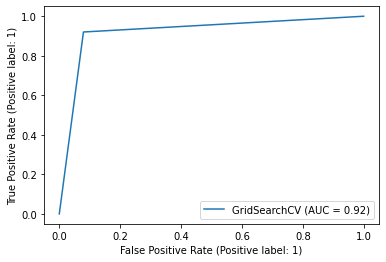

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


In [43]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
X = Scale()
X = Kbest(X[0], X[1], 48)
X_train_svm = X[0]
X_test_svm = X[1]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
from sklearn.neighbors import KNeighborsClassifier
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=3)
#Fit the model
model = clf.fit(X_train_svm, y_train)
y_pred = model.predict(X_test_svm)
print("Accuracy Knn : ", metrics.accuracy_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)
print(classification_report(y_test, y_pred))
svc_disp = RocCurveDisplay.from_estimator(model, X_test_svm, y_test)
plt.show()
#Print The value of best Hyperparameters
print('Best leaf_size:', model.best_estimator_.get_params()['leaf_size'])
print('Best p:',model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', model.best_estimator_.get_params()['n_neighbors'])

traning...
Accuracy Random Forest :  0.9478333333333333
Confusion Matrix:
[[2929  121]
 [ 192 2758]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3050
           1       0.96      0.93      0.95      2950

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000



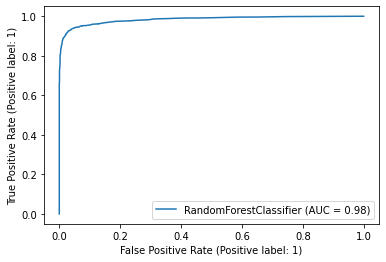

In [46]:
print("traning...")
rf_w = RandomForestClassifier(random_state=100, bootstrap=True,max_features= 'sqrt',min_samples_leaf= 1,min_samples_split= 2,n_estimators= 100)
rf_w.fit(X_train, y_train)
y_pred_rf_w = rf_w.predict(X_test)
print("Accuracy Random Forest : ",
      metrics.accuracy_score(y_test, y_pred_rf_w))
conf_mat = confusion_matrix(y_test, y_pred_rf_w)
print("Confusion Matrix:")
print(conf_mat)
print(classification_report(y_test, y_pred_rf_w))
svc_disp = RocCurveDisplay.from_estimator(rf_w, X_test, y_test)
plt.show()

In [10]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
print("traning...")
rf_w = RandomForestClassifier(random_state=100, n_estimators=100)
rf_w.fit(X_train, y_train)
y_pred_rf_w = rf_w.predict(X_test)
print("Accuracy Random Forest : ",
      metrics.accuracy_score(y_test, y_pred_rf_w))
conf_mat = confusion_matrix(y_test, y_pred_rf_w)
print("Confusion Matrix:")
print(conf_mat)

print('Parameters currently in use:\n')
pprint(rf_w.get_params())

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


traning...
Accuracy Random Forest :  0.9478333333333333
Confusion Matrix:
[[2929  121]
 [ 192 2758]]
Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}


In [11]:
rf_random = RandomizedSearchCV(estimator = rf_w, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
print("traning...")
rf_random.fit(X_train, y_train)
pprint(rf_random.best_params_)
y_pred_rf_random = rf_random.predict(X_test)
print("Accuracy Random Forest : ",
      metrics.accuracy_score(y_test, y_pred_rf_random))
conf_mat = confusion_matrix(y_test, y_pred_rf_random)
print("Confusion Matrix:")
print(conf_mat)

traning...
Fitting 2 folds for each of 100 candidates, totalling 200 fits
{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 311}
Accuracy Random Forest :  0.9471666666666667
Confusion Matrix:
[[2932  118]
 [ 199 2751]]


In [15]:
X = Scale()
X = Kbest(X[0], X[1], 52)
X_train_svm = X[0]
X_test_svm = X[1]
#print("Training samples SVM: ", X_train_svm.shape)
clf = svm.SVC(kernel='rbf', gamma=0.7, C=200, probability= True)
print("traning...")
clf.fit(X_train_svm, y_train)
y_pred = clf.predict(X_test_svm)
print("Accuracy linear SVM : ", metrics.accuracy_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)



traning...
Accuracy linear SVM :  0.9233333333333333
Confusion Matrix:
[[2883  167]
 [ 293 2657]]


In [10]:
from sklearn.model_selection import GridSearchCV

#param_grid = {'C': [ 0.55,0.60,0.65,0.7,0.75],
#			'gamma': [90,100,150, 200, 250],
#			}

param_grid = {'C': [0.65,0.7,0.75],
			'gamma': [150, 200,250],
            "kernel": ['rbf']}
			

grid = GridSearchCV(clf, param_grid, refit = True, cv=2,verbose=3)
# fitting the model for grid search
grid.fit(X_train_svm, y_train)
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test_svm)

# print classification report
print(classification_report(y_test, grid_predictions))
print("Accuracy Besy grid SVM : ",
      metrics.accuracy_score(y_test, grid_predictions))

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2] END .....C=0.65, gamma=150, kernel=rbf;, score=0.824 total time=  19.9s
[CV 2/2] END .....C=0.65, gamma=150, kernel=rbf;, score=0.833 total time=  17.6s
[CV 1/2] END .....C=0.65, gamma=200, kernel=rbf;, score=0.819 total time=  17.7s
[CV 2/2] END .....C=0.65, gamma=200, kernel=rbf;, score=0.828 total time=  17.9s
[CV 1/2] END .....C=0.65, gamma=250, kernel=rbf;, score=0.813 total time=  19.1s
[CV 2/2] END .....C=0.65, gamma=250, kernel=rbf;, score=0.823 total time=  19.1s
[CV 1/2] END ......C=0.7, gamma=150, kernel=rbf;, score=0.830 total time=  17.3s
[CV 2/2] END ......C=0.7, gamma=150, kernel=rbf;, score=0.837 total time=  17.5s
[CV 1/2] END ......C=0.7, gamma=200, kernel=rbf;, score=0.823 total time=  20.0s
[CV 2/2] END ......C=0.7, gamma=200, kernel=rbf;, score=0.831 total time=  18.2s
[CV 1/2] END ......C=0.7, gamma=250, kernel=rbf;, score=0.817 total time=  19.8s
[CV 2/2] END ......C=0.7, gamma=250, kernel=rbf;,

In [12]:
conf_mat = confusion_matrix(y_test, grid_predictions)
print("Confusion Matrix:")
print(conf_mat)
print(NPV(y_test, grid_predictions))

Confusion Matrix:
[[3028   22]
 [ 724 2226]]
0.8070362473347548


In [33]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'min_samples_leaf': [1,2,3,4],
    'min_samples_split': [2, 3,4],
    'n_estimators': [90,100]
}

grid_search = GridSearchCV(estimator = rf_w, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
y_pred_rf_grid = best_grid.predict(X_test)
print("Accuracy Random Forest : ",
      metrics.accuracy_score(y_test, y_pred_rf_grid))
conf_mat = confusion_matrix(y_test, y_pred_rf_grid)
print("Confusion Matrix:")
print(conf_mat)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy Random Forest :  0.9478333333333333
Confusion Matrix:
[[2929  121]
 [ 192 2758]]


{'C': 0.85, 'gamma': 100}
SVC(C=0.85, gamma=100)
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      3050
           1       0.99      0.78      0.87      2950

    accuracy                           0.89      6000
   macro avg       0.91      0.89      0.89      6000
weighted avg       0.90      0.89      0.89      6000

Accuracy Random Forest :  0.8871666666666667


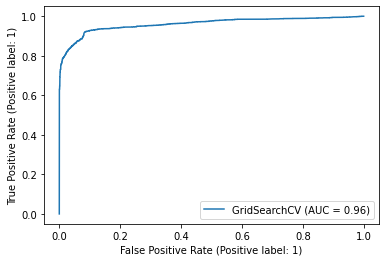

In [39]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [ 0.7,0.75, 0.8,0.85],
			'gamma': [100,150, 200, 250],
			}

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, cv=3)
X = Scale()
X = Kbest(X[0], X[1], 52)
X_train_svm = X[0]
X_test_svm = X[1]
# fitting the model for grid search
grid.fit(X_train_svm, y_train)
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test_svm)
 
# print classification report
print(classification_report(y_test, grid_predictions))
print("Accuracy Random Forest : ",
      metrics.accuracy_score(y_test, grid_predictions))
svc_disp = RocCurveDisplay.from_estimator(grid, X_test_svm, y_test)
plt.show()



In [40]:
print(confusion_matrix(y_test, grid_predictions))

[[3019   31]
 [ 646 2304]]


In [25]:
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
X = Scale()
X = Kbest(X[0], X[1], 49)
X_train_svm = X[0]
X_test_svm = X[1]
print('Training..')
classifier.fit(X_train_svm, y_train)
y_pred = classifier.predict(X_test_svm)
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)
print("Accuracy of MLPClassifier using the function :", accuracyCM(conf_mat))
print("Accuracy MLP: ", metrics.accuracy_score(y_test, y_pred))


classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
a=0
j=0
for i in tqdm(range(1,52)):
    X1 = Kbest(X[0], X[1], i)
    X_train_svm = X1[0]
    X_test_svm = X1[1]
    print("Training Samples: ", X_train_svm.shape)
    print('Training..')
    classifier.fit(X_train_svm, y_train)
    y_pred = classifier.predict(X_test_svm)
    temp=  metrics.accuracy_score(y_test, y_pred)
    if temp > a:
        a = temp
        j = i
    print("Accuracy MLP: ",i ,"= ", metrics.accuracy_score(y_test, y_pred))

print("Best Accuracy: ", a)
print("Best K: ", j)



Training..
Confusion Matrix:
[[2886  164]
 [ 235 2715]]
Accuracy of MLPClassifier using the function : 0.9335
Accuracy MLP:  0.9335


  0%|          | 0/51 [00:00<?, ?it/s]

Training Samples:  (14000, 1)
Training..


  2%|▏         | 1/51 [00:08<06:54,  8.30s/it]

Accuracy MLP:  1 =  0.7186666666666667
Training Samples:  (14000, 2)
Training..


c:\Users\moham\OneDrive\Desktop\malware\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
  4%|▍         | 2/51 [00:21<09:07, 11.17s/it]

Accuracy MLP:  2 =  0.7673333333333333
Training Samples:  (14000, 3)
Training..


c:\Users\moham\OneDrive\Desktop\malware\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
  6%|▌         | 3/51 [00:44<13:11, 16.49s/it]

Accuracy MLP:  3 =  0.8091666666666667
Training Samples:  (14000, 4)
Training..
